# GATHER DATA

In [10]:
# IMPORT PACKAGES
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [2]:
# IMPORT CSVs 

'''
A dataframe's name is formated as "advPassYR.csv" where we replace 'YR' with 
its numerical equivalent. For instance, if we wanted the data for 2022, it is
saved in a file named 'advPass22.csv'. 

The dataframe contains the entire league's defensive passing metrics, including
features such as passer rating allowed, Y/A allowed, sacks produced, etc.

We will store each dataframe in a list, this way we can store each dataframe
in one convenient data type. This allows us to automate the process of retrieving each
dataframe, as we can do this in one loop instead of manually storing each dataframe
to a single variable. 
'''

# Create list of years so it's easier to find CSVs
years = [18, 19, 20, 21, 22, 23]

# TODO: consider using a dictionary instead
# Create list of dataframes
data = []

# Create list of abbreviations for labeling purposes
abvs = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 
        'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LV', 'LAC', 
        'LAR', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 
        'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS']


# Goes through each dataframe in folder and adds it to 'data' list

for year in years:
    file_name = "Data/advPass" + str(year) + ".csv"
    data.append(pd.read_csv(file_name))

# Add in abvs as a column to dataframe
for x in data:
    x.insert(1, "Abv", abvs, True)


In [5]:
#VERIFY CSV IMPORTS

'''
for x in data:
    print(x.head())
'''

'\nfor x in data:\n    print(x.head())\n'

# CREATE HELPER FUNCTIONS

In [11]:
# DEFINE PERCENT FORMATTER FUNCTION
'''
This function formats the y-axis ticks as percentages.
This is important as we convert the list of percentages
into numerics and add back to percentage values.
'''
def percent_formatter(x, pos):
    return f'{x}%'


In [12]:
# DEFINE GRAPH FUNCTION 

'''
These parameters take in the dataframe, the year of data you want, 
the column of data (i.e. the dependent variable) you want to compare with 
vs the blitz% (and only the blitz%), what you want to label the dependent variable,
and whether to add a percentage sign to the y-axis.

TLDR: Parameters are, respectively, the dataframe, dataframe's year, dependent var, dependent var's label, add
percentage sign to y-axis ticks.

This function will take the parameters and graph the plot between the user's desired dependent variable
to the blitz%.

Additionally it will find the median of the dependent variable as well as the number Wink's defenses attained.

If we want to generalize this function, we could theorhetically add another parameter that replaces blitz% with any 
independent variable a user chooses. We would also remove the markers designed specifically for Wink's defenses.
'''

def blitzGrapher(cur_data, year, col, ylab, prc=False):
    # Labels teams' data with their abbreviation
    for i, label in enumerate(cur_data['Abv']):
        plt.annotate(label, (cur_data['Bltz%'][i], cur_data[col][i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Sorts teams to plot by ascending bltz%. This is needed for the data points to not be out of order.
    # Can't numerically sort since the percentage values are actually strings, not numericals.
    cur_data = cur_data.sort_values(by='Bltz%')
    
    # Accounts for the change of Wink's teams in 2022
    if year < 22:
        row_index = cur_data[cur_data['Abv'] == 'BAL'].index[0]
        colors = ['blue' if label != 'BAL' else 'red' for label in cur_data['Abv']]
    else:
        row_index = cur_data[cur_data['Abv'] == 'NYG'].index[0]
        colors = ['blue' if label != 'NYG' else 'red' for label in cur_data['Abv']]

    # Create plots
    plt.scatter(cur_data['Bltz%'], cur_data[col], color=colors)

    if prc==True:
        # Create a formatter using the percent_formatter function
        formatter = FuncFormatter(percent_formatter)

        # Apply the formatter to the y-axis ticks
        plt.gca().yaxis.set_major_formatter(formatter)

    # Add labels and title
    plt.xlabel('Blitz Rate')
    plt.ylabel(ylab)
    plt.title('Blitz Rate vs ' + ylab + ' 20' + str(year))

    plt.xticks(range(1, 32, 6))

    # Add line for median num of league sacks and line for num of Wink sacks respectively
    plt.axhline(cur_data[col].median(), color='blue', linestyle='--', linewidth=2)
    plt.axhline(cur_data.at[row_index, col], color='red', linestyle='--', linewidth=2)

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

In [23]:
# CONVERT BLITZ% INTO NUMERIC

'''
This is not a function but it is important to
convert blitz% into numeric in order to find the  
correlation between blitz% and other features.
'''

bltz_percent = []

for x in range(len(data)):
    cur_data = data[x]
    bltz_percent.append(cur_data['Bltz%'].str.replace('%', ''))

for i in range(len(bltz_percent)):
    for j in range(len(bltz_percent[i])):
        bltz_percent[i][j] = float(bltz_percent[i][j])

# CREATE GRAPHS

- ## Blitz vs Sacks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


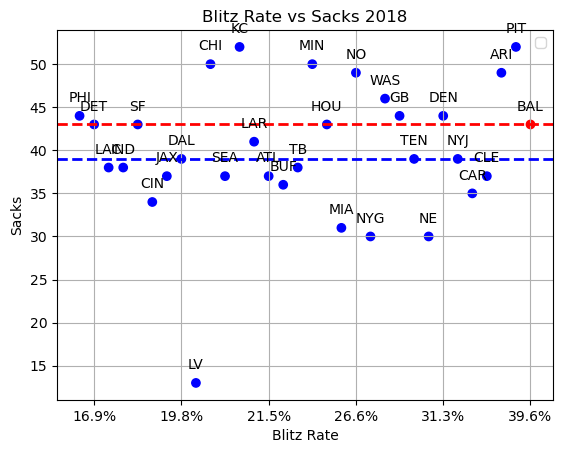

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


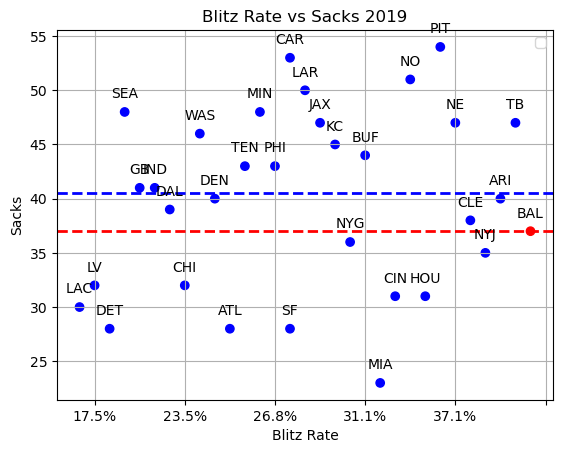

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


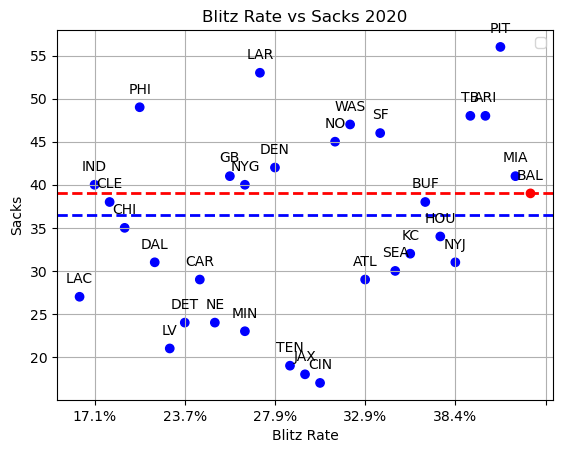

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


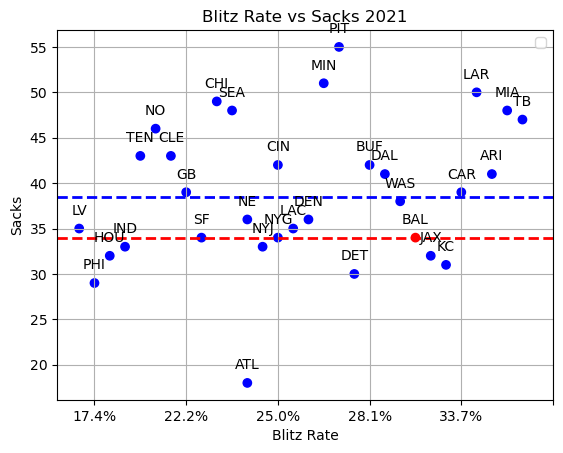

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


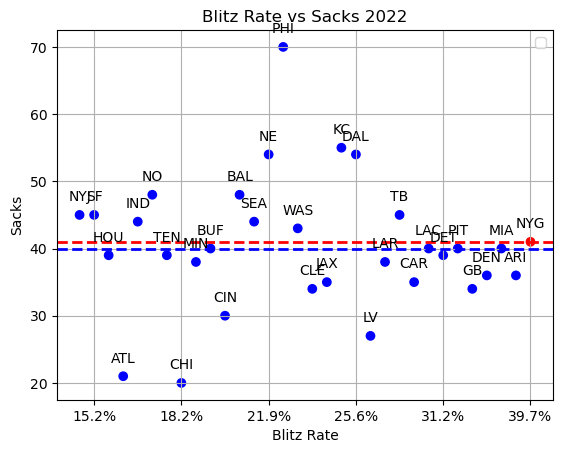

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


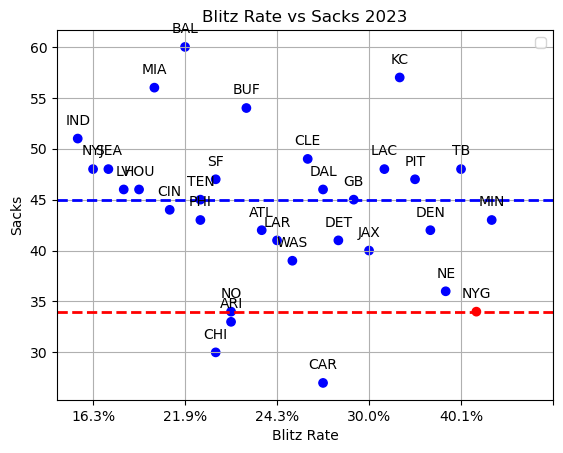

In [5]:
# CREATE BLITZ vs SACK GRAPHS

'''
We take the list of the dataframes, go through each dataframe and each 
year in the data frame, and we graph the number of sacks vs blitz rate.
'''

for x in range(len(data)):
    blitzGrapher(data[x], years[x], 'Sk', 'Sacks')

In [26]:
# FIND CORRELATIONS B/W BLTZ% & SKs

for x in range(len(data)):
    cur_data = data[x]
    print("The correlation b/w BLTZ% and SKs in 20" + str(years[x]) + " is " + str(bltz_percent[x].corr(cur_data['Sk'])))

The correlation b/w BLTZ% and SKs in 2018 is 0.18104377708635822
The correlation b/w BLTZ% and SKs in 2019 is 0.1678191052254649
The correlation b/w BLTZ% and SKs in 2020 is 0.2908726176299426
The correlation b/w BLTZ% and SKs in 2021 is 0.27019556191600713
The correlation b/w BLTZ% and SKs in 2022 is -0.051130895264602884
The correlation b/w BLTZ% and SKs in 2023 is -0.18735197856795616


In [ ]:
# CREATE GRAPH w/o POINTS
# TODO: Fix this 
'''
cur_data = data[0]
cur_data = cur_data.sort_values(by='Bltz%')

# Create a scatter plot without markers
for index, row in cur_data.iterrows():
    plt.text(row['Bltz%'], row['Sk'], row['Abv'], fontsize=12, ha='center', va='center')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Labels Only')

plt.grid(True)
plt.show()
'''

- ## Blitz vs Pressure%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


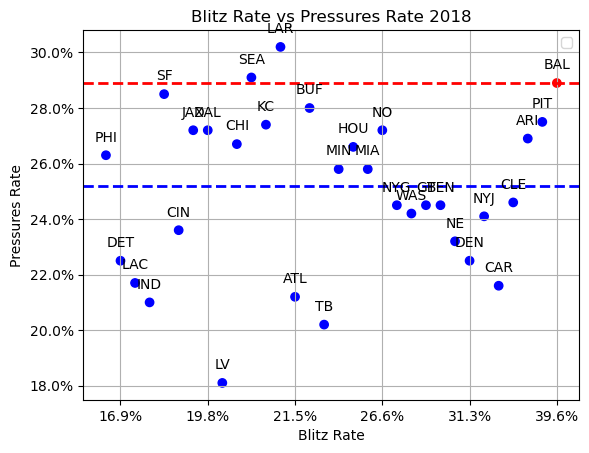

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


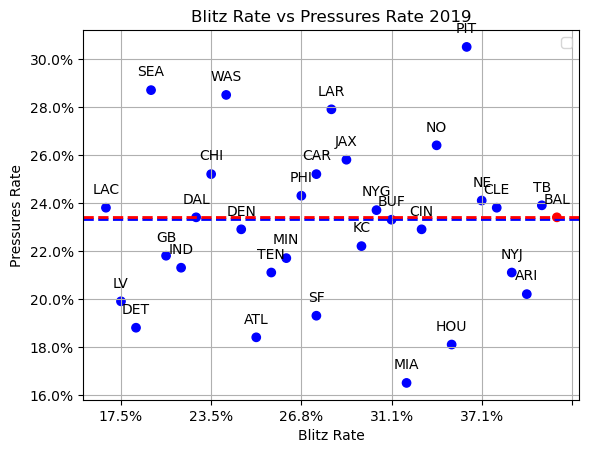

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


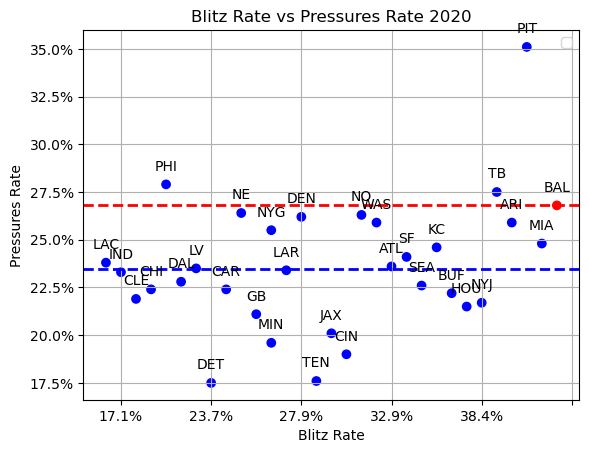

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


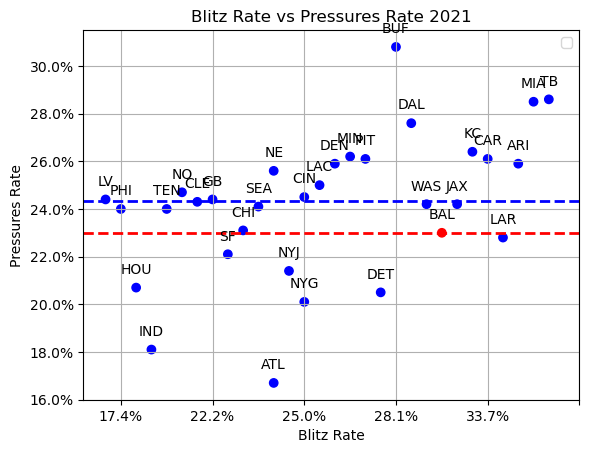

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


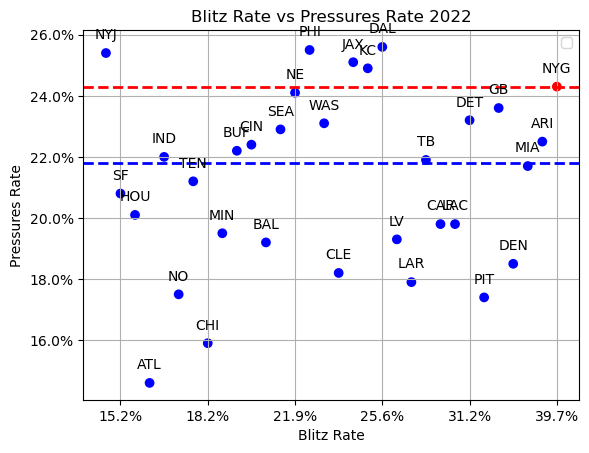

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


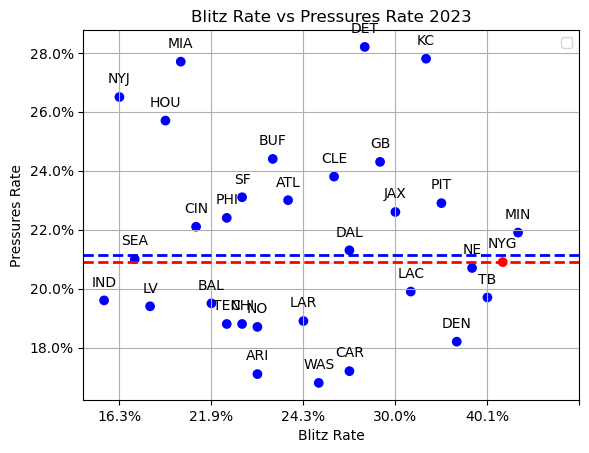

In [13]:
# CREATE BLITZ vs PRESSURE% Graph

# print(data[0].head())

# TODO: resolve 'Prss%' to numeric
# SOLs: - sort Prss% like blitz%
#       - convert string to numerical by removing % and dividing by 100

# print(data[0].dtypes)


    
for x in range(len(data)):
    data[x]['Prss'] = data[x]['Prss%'].str.strip('%').astype(float)
    blitzGrapher(data[x], years[x], 'Prss', 'Pressures Rate', True)

In [27]:
# FIND CORRELATION BETWEEN BLITZ% AND PRSS%

for x in range(len(data)):
    cur_data = data[x]
    print("The correlation b/w BLTZ% and PRSS% in 20" + str(years[x]) + " is " + str(bltz_percent[x].corr(cur_data['Prss'])))

The correlation b/w BLTZ% and PRSS% in 2018 is 0.10391559163250932
The correlation b/w BLTZ% and PRSS% in 2019 is 0.06456471052616543
The correlation b/w BLTZ% and PRSS% in 2020 is 0.33127444406144047
The correlation b/w BLTZ% and PRSS% in 2021 is 0.4556891123890515
The correlation b/w BLTZ% and PRSS% in 2022 is 0.14755553216688433
The correlation b/w BLTZ% and PRSS% in 2023 is -0.02786973954638392


# TODO: Implement following analyses:

- ~~**Correlation between blitz% & press%** (probably the most salient since his main defensive principle is to pressure QB)~~
- Correlation between passer rating & blitz%. Need to see blitz% overall effects on passing defense.
- Correlation between sck% & blitz%. (Probably the least important feature as we already have sack numbers)
- Correlation between Y/C & blitz%. Need to see if this is jeopardizing run D and can explain Witz's terrible run defenses.
    * This will probably require some more data importing as run D stats will likely be in another CSV
- Organize the code s.t. there is a header above each code chunk (e.g. header above chunk that plots sck% & blitz%)
- Compare NYG's stats before Wink's arrival
    * Compare BAL's stats after Wink's departure